# Konten
* [Pengenalan]
* [Tahap 1 Inialisasi]
* [Tahap 2 Memuat Data]
* [Tahap 3 Mempersiapkan Data]
    * [3.1 Paket Prabayar]
* [Tahap 4 Memperkaya Kualitas Data]
    * [4.1 Penggunal]
    * [4.2 Panggilan]
    * [4.3 Pesan/SMS]
    * [4.4 Internet]
* [Tahap 5 Mempelajari Syarat dan Kondisi Terkait Paket Prabayar]
* [Tahap 6 Menggabungkan Data]
    * [6.1 Menambahkan Informasi Prabayar]
    * [6.2 menambahkan Pendapatan Perbulan]
* [Tahap 7 Mempelajari Prilaku Pengguna]
    * [7.1 Panggilan]
    * [7.2 Pesan/SMS]
    * [7.3 Internet]
    * [7.4 Pendapatan]
* [Tahap 8 Menguji Hipotesis Statistik]
* [Tahap 9 Kesimpulan Umum]

# Pengenalan
Ptojek kali ini adalah tentang paket yang ditawarkan oleh suatu perusahaan bernama Megaline. Paket yang ditawarkan ada dua yaitu paket Ultimate dan paket Surf. Masing-masing paket memiliki keunggulannya masing-masing sesuai dengan kebutuhan pengguna. Data pengguna terdiri dari 500 yang diambil di tahun 2018. Adapun tujuan projek kali ini adalah:
- Menganalisis prilaku pengguna dalam memilih paket.
- Menganalisis paket mana yang paling menguntungkan.
- Menganalisis pendapatan paket Ultimate dan Surf.
- Menganalisis pendapatan dari beberapa kota.

# Inisialisasi

In [120]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# Memuat Data

In [121]:
try:
    users_data = pd.read_csv('D:\datasets\projek_4\megaline_users.csv')
    calls_data = pd.read_csv('D:\datasets\projek_4\megaline_calls.csv')
    messages_data = pd.read_csv('D:\datasets\projek_4\megaline_messages.csv')
    internet_data = pd.read_csv('D:\datasets\projek_4\megaline_internet.csv')
    plans_data = pd.read_csv('D:\datasets\projek_4\megaline_plans.csv')
except:
    users_data = pd.read_csv('/datasets/megaline_users.csv')
    calls_data = pd.read_csv('/datasets/megaline_calls.csv')
    messages_data = pd.read_csv('/datasets/megaline_messages.csv')
    internet_data = pd.read_csv('/datasets/megaline_internet.csv')
    plans_data = pd.read_csv('/datasets/megaline_plans.csv')

# Mempersiapkan Data

## Paket Prabayar

In [122]:
plans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [123]:
plans_data

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Dari informasi di atas, kita mendapatkan bahwa:
- Data terdiri dari **2** baris dan **8** kolom.
- Terdapat 2 katergori untuk paket, yaitu **surf** dan **ultimate**.
- Untuk tipe data tida ada yang salah dan tidak ada missing values yang perlu diisi.

# Memperkaya Kualitas Data

## Pengguna

In [124]:
users_data.shape

(500, 8)

In [125]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [126]:
users_data.tail(11)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
489,1489,Londa,Jenkins,72,"Detroit-Warren-Dearborn, MI MSA",2018-05-24,surf,NaN
490,1490,Shane,Cortez,42,"Sacramento–Roseville–Folsom, CA MSA",2018-01-20,ultimate,NaN
491,1491,Terina,Jensen,22,"Grand Rapids-Kentwood, MI MSA",2018-04-27,surf,2018-09-18
492,1492,Elvie,Jones,63,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-03-07,surf,NaN
493,1493,Cicely,Wynn,18,"Boston-Cambridge-Newton, MA-NH MSA",2018-03-06,ultimate,NaN
494,1494,Preston,Downs,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-19,surf,NaN
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


Dari informasi di atas kita mendapatkan bahwa:
- Data memiliki **8** kolom dan **500** baris.
- Pada kolom `churn_date` hanya ada **34** kolom yang terisi. Ini artinya ada **466** data yang berisi missing values.
- Kolom `churn_date` hanya mengisi nilainya dengan in used. Hal ini dikarenakan pengguna masih menggunakan paket tersebut saat data ini diberikan.
- Pada kolom `reg_date` dan `churn_date` memiliki tipe data yang tidak sesuai yaitu tipe data object. Maka dari itu tipe data akan diubah menjadi tipe data datetime.

### Memperbaiki Data

In [127]:
column = ['reg_date', 'churn_date']
for col in column:
    users_data[col] = pd.to_datetime(users_data[col], format='%Y-%m-%d')

In [128]:
users_data.head(11)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT


In [129]:
users_data.drop('churn_date', axis='columns', inplace=True)

In [130]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 27.5+ KB


### Memperkaya Kualitas Data

Menambahkan faktor bulan pada data.

In [131]:
users_data['months'] = users_data['reg_date'].dt.month

## Panggilan

In [132]:
calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [133]:
calls_data.shape

(137735, 4)

In [134]:
calls_data.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [135]:
calls_data['duration'].sort_values().unique()

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 3.588e+01, 3.624e+01,
       3.760e+01])

In [136]:
calls_data[calls_data['duration']<1]

,id,user_id,call_date,duration
19,1001_4,1001,2018-12-05,0.00
25,1001_13,1001,2018-12-24,0.00
28,1001_23,1001,2018-10-27,0.98
31,1001_30,1001,2018-10-17,0.00
32,1001_31,1001,2018-11-03,0.00
...,...,...,...,...
137720,1499_189,1499,2018-12-27,0.00
137722,1499_191,1499,2018-12-24,0.00
137725,1499_194,1499,2018-10-31,0.00
137727,1499_196,1499,2018-11-22,0.27


In [137]:
len(calls_data[calls_data['duration']<1])/len(calls_data) * 100

23.63887174646967

In [138]:
calls_data.duplicated().sum()

0

Dari informasi di atas kita mendapatkan bahwa:
- Data ini terdiri dari **137735** baris dan **4** kolom.
- Untuk kolom `call_date` memiliki tipe data yang tidak sesuai dan akan diubah menjadi tipe data datetime.
- Untuk kolom `duration` memiliki tipe data float. Nilai tersebut akan dibulatkan ke atas dan akan diubah tipe datanya menjadi int.
- Pada kolom `duration` memiliki sekitar **23%** data yang bernilai 0 menit. Hal ini mungkin dikarenakan adanya panggilan tak terjawab.

### Memperbaiki Data

In [139]:
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'], format='%Y-%m-%d') 

In [140]:
calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [141]:
calls_data['duration'] = calls_data['duration'].apply(np.ceil)

In [142]:
calls_data.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0


Untuk nilai **0** pada kolom `duration` tidak akan dihapus. Mengingat begitu besar jumlah nilai **0** pada kolom tersebut

In [143]:
calls_data['duration'] = calls_data['duration'].astype('int64')

In [144]:
calls_data.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5


### Memperkaya Kualitas Data

In [145]:
calls_data['months'] = calls_data['call_date'].dt.month

In [146]:
calls_data

,id,user_id,call_date,duration,months
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12
3,1000_309,1000,2018-12-28,6,12
4,1000_380,1000,2018-12-30,5,12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9,11
137731,1499_200,1499,2018-10-20,11,10
137732,1499_201,1499,2018-09-21,9,9
137733,1499_202,1499,2018-10-10,1,10


In [147]:
count = calls_data.pivot_table(index='user_id', columns='months',values='duration', aggfunc='count')
count.tail(10)

months,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1490,NaN,NaN,NaN,NaN,NaN,NaN,16.0,80.0,68.0,43.0,55.0,50.0
1491,NaN,NaN,NaN,8.0,48.0,64.0,60.0,54.0,52.0,75.0,46.0,55.0
1492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,54.0,49.0,46.0
1493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,66.0,66.0,73.0,65.0
1494,NaN,NaN,NaN,NaN,NaN,NaN,43.0,78.0,67.0,78.0,82.0,72.0
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,75.0,61.0,65.0
1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,52.0,46.0,39.0,40.0
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0
1498,NaN,37.0,37.0,47.0,35.0,37.0,43.0,44.0,45.0,46.0,41.0,39.0


In [148]:
def calls_month(month, user_id):
    return count[month][user_id]

In [149]:
calls_month(12, 1000)

16.0

In [150]:
calls_data['total_calls_per_month'] = calls_data.apply(lambda x: calls_month(x['months'], x['user_id']), axis=1)

In [151]:
calls_data['total_calls_per_month'] = calls_data['total_calls_per_month'].astype('int64')

In [152]:
calls_data

,id,user_id,call_date,duration,months,total_calls_per_month
0,1000_93,1000,2018-12-27,9,12,16
1,1000_145,1000,2018-12-27,14,12,16
2,1000_247,1000,2018-12-27,15,12,16
3,1000_309,1000,2018-12-28,6,12,16
4,1000_380,1000,2018-12-30,5,12,16
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9,11,45
137731,1499_200,1499,2018-10-20,11,10,53
137732,1499_201,1499,2018-09-21,9,9,41
137733,1499_202,1499,2018-10-10,1,10,53


In [153]:
durations = calls_data.pivot_table(index='user_id', columns='months',values='duration', aggfunc='sum')
durations

months,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.0,315.0,393.0,426.0,412.0
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,386.0,384.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1104.0
1004,NaN,NaN,NaN,NaN,193.0,275.0,381.0,354.0,301.0,365.0,476.0,427.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302.0,610.0,361.0,492.0
1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.0,414.0,317.0,308.0,294.0
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0


In [154]:
def total_duration(month, user_id):
    return durations[month][user_id]

In [155]:
durations[12][1000]

124.0

In [156]:
total_duration(12, 1000)

124.0

In [157]:
calls_data['total_durations'] = calls_data.apply(lambda x: total_duration(x['months'], x['user_id']), axis=1)

In [158]:
calls_data['total_durations'] = calls_data['total_durations'].astype('int64')

In [159]:
calls_data

,id,user_id,call_date,duration,months,total_calls_per_month,total_durations
0,1000_93,1000,2018-12-27,9,12,16,124
1,1000_145,1000,2018-12-27,14,12,16,124
2,1000_247,1000,2018-12-27,15,12,16,124
3,1000_309,1000,2018-12-28,6,12,16,124
4,1000_380,1000,2018-12-30,5,12,16,124
...,...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9,11,45,308
137731,1499_200,1499,2018-10-20,11,10,53,385
137732,1499_201,1499,2018-09-21,9,9,41,346
137733,1499_202,1499,2018-10-10,1,10,53,385


## Pesan/SMS

In [160]:
messages_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [161]:
messages_data.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [162]:
messages_data.duplicated().sum()

0

Dari informasi di atas, kita mendapatkan bahwa:
- Data terdiri dari **76051** baris dan **3** kolom. Tidak ada nilai yang hilang pada data tersebut.
- Tipe data pada kolom `message_date` adalah object yang seharusnya adalah datetime. 

### Memperbaiki Data

In [163]:
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'], format='%Y-%m-%d')

In [164]:
messages_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [165]:
messages_data.tail()

,id,user_id,message_date
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24
76050,1497_613,1497,2018-12-23


In [166]:
messages_data[messages_data['user_id']==1001].sort_values(by='message_date')

,id,user_id,message_date
137,1001_267,1001,2018-08-14
128,1001_247,1001,2018-08-15
112,1001_212,1001,2018-08-15
104,1001_192,1001,2018-08-15
54,1001_91,1001,2018-08-15
...,...,...,...
208,1001_403,1001,2018-12-30
179,1001_348,1001,2018-12-30
183,1001_360,1001,2018-12-30
21,1001_21,1001,2018-12-30


### Memperkaya Kualitas Data

In [167]:
messages_data['months'] = messages_data['message_date'].dt.month

In [168]:
messages_data.head(10)

,id,user_id,message_date,months
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
5,1000_346,1000,2018-12-29,12
6,1000_386,1000,2018-12-30,12
7,1000_413,1000,2018-12-31,12
8,1000_502,1000,2018-12-27,12
9,1000_525,1000,2018-12-28,12


In [169]:
count_messages = messages_data.pivot_table(index='user_id', columns='months', values='message_date', aggfunc='count')
count_messages

months,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,44.0,53.0,36.0,44.0
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,32.0,41.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0
1004,NaN,NaN,NaN,NaN,7.0,18.0,26.0,25.0,21.0,24.0,25.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1491,NaN,NaN,NaN,6.0,45.0,54.0,64.0,50.0,50.0,51.0,46.0,43.0
1492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,29.0,31.0,37.0
1494,NaN,NaN,NaN,NaN,NaN,NaN,20.0,27.0,21.0,38.0,35.0,33.0


In [170]:
def month_messages(month, user_id):
    return count_messages[month][user_id]

In [171]:
messages_data['messages_permonth'] = messages_data.apply(lambda x: month_messages(x['months'], x['user_id']), axis=1)

In [172]:
messages_data['messages_permonth'] = messages_data['messages_permonth'].astype('int64')

In [173]:
messages_data

,id,user_id,message_date,months,messages_permonth
0,1000_125,1000,2018-12-27,12,11
1,1000_160,1000,2018-12-31,12,11
2,1000_223,1000,2018-12-31,12,11
3,1000_251,1000,2018-12-27,12,11
4,1000_255,1000,2018-12-26,12,11
...,...,...,...,...,...
76046,1497_526,1497,2018-12-24,12,50
76047,1497_536,1497,2018-12-24,12,50
76048,1497_547,1497,2018-12-31,12,50
76049,1497_558,1497,2018-12-24,12,50


## Internet

In [174]:
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [175]:
internet_data.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [176]:
internet_data.duplicated().sum()

0

Dari informasi di atas, kita dapat menyimpulkan bahwa:
- Terdapat **104825** baris dan **4** kolom.
- Tidak ada missing values pada data tersebut.
- Untuk tipe data terdapat kesalahan pada kolom `session_date`. Dari objek akan diubah menjadi datetime.

### Memperbaiki Data

In [177]:
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'], format='%Y-%m-%d')

In [178]:
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Memperkaya Kualitas Data

In [179]:
internet_data['months'] = internet_data['session_date'].dt.month

In [180]:
internet_data

,id,user_id,session_date,mb_used,months
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10
104821,1499_216,1499,2018-12-30,304.72,12
104822,1499_217,1499,2018-09-22,292.75,9
104823,1499_218,1499,2018-12-07,0.00,12


In [181]:
count_volume = internet_data.pivot_table(index='user_id', columns='months', values='mb_used', aggfunc='sum')
count_volume

months,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901.47
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6919.15,13314.82,22330.49,18504.30,19369.18
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6552.01,19345.08,14396.24
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27044.14
1004,NaN,NaN,NaN,NaN,6547.21,20672.82,24516.62,27981.74,18852.72,14541.63,21850.78,21389.29
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22981.37,26899.41,24912.78,24097.40
1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8605.66,16389.27,14287.36,8547.36,16438.99
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11106.55


In [182]:
def total_volume(month, user_id):
    return count_volume[month][user_id]

In [183]:
internet_data['volume_permonth'] = internet_data.apply(lambda x: total_volume(x['months'], x['user_id']), axis=1)

In [184]:
internet_data

,id,user_id,session_date,mb_used,months,volume_permonth
0,1000_13,1000,2018-12-29,89.86,12,1901.47
1,1000_204,1000,2018-12-31,0.00,12,1901.47
2,1000_379,1000,2018-12-28,660.40,12,1901.47
3,1000_413,1000,2018-12-26,270.99,12,1901.47
4,1000_442,1000,2018-12-27,880.22,12,1901.47
...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10,19492.43
104821,1499_216,1499,2018-12-30,304.72,12,22059.21
104822,1499_217,1499,2018-09-22,292.75,9,12984.76
104823,1499_218,1499,2018-12-07,0.00,12,22059.21


# Mempelajari Syarat dan Kondisi Terkait Paket Prabayar

In [185]:
plans_data

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Dari data di atas dapat disimpulkan bahwa pengguna:
- Pengguna mendapatkan keuntungan untuk setiap jenis paket yang dibeli.
- Untuk mb setiap paket berbeda. Tetapi untuk satu 1 gb itu setara dengan 1024 mb
- Untuk setiap paket memiliki biaya tambahan apabila melebihi kapasitas paket yang disediakan.
- Apabila kapasistas kuota mencapai 1025 mb maka akan dikenakan tarif seperti 2 gb.
- Untuk telpon dan sms apabila hanya beberapa detik saja menggunakan telpon, maka akan dikenakan tarif sebesar 3 sen dan 1 sen.

# Menggabungkan Data

In [186]:
new_call_data = calls_data[['user_id', 'months','total_calls_per_month', 'total_durations']]
new_call_data = new_call_data.drop_duplicates().reset_index(drop=True)
new_call_data

,user_id,months,total_calls_per_month,total_durations
0,1000,12,16,124
1,1001,9,49,315
2,1001,10,65,393
3,1001,12,56,412
4,1001,11,64,426
...,...,...,...,...
2253,1498,3,37,266
2254,1499,11,45,308
2255,1499,10,53,385
2256,1499,12,65,496


In [187]:
new_message_data = messages_data[['user_id', 'months','messages_permonth']]
new_message_data = new_message_data.drop_duplicates().reset_index(drop=True)
new_message_data

,user_id,months,messages_permonth
0,1000,12,11
1,1001,11,36
2,1001,8,30
3,1001,12,44
4,1001,10,53
...,...,...,...
1801,1496,9,21
1802,1496,12,11
1803,1496,10,18
1804,1496,8,2


In [188]:
new_internet_data = internet_data[['user_id', 'months','volume_permonth']]
new_internet_data = new_internet_data.drop_duplicates().reset_index(drop=True)
new_internet_data

,user_id,months,volume_permonth
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,12,19369.18
3,1001,11,18504.30
4,1001,10,22330.49
...,...,...,...
2272,1498,8,20261.89
2273,1499,12,22059.21
2274,1499,11,16813.83
2275,1499,10,19492.43


In [189]:
df = new_call_data.merge(new_message_data, how='outer',on=['user_id', 'months'])
df1 = df.merge(new_internet_data, how='outer',on=['user_id', 'months'])
df1

,user_id,months,total_calls_per_month,total_durations,messages_permonth,volume_permonth
0,1000,12,16.0,124.0,11.0,1901.47
1,1001,9,49.0,315.0,44.0,13314.82
2,1001,10,65.0,393.0,53.0,22330.49
3,1001,12,56.0,412.0,44.0,19369.18
4,1001,11,64.0,426.0,36.0,18504.30
...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13039.91
2289,1361,5,NaN,NaN,2.0,1519.69
2290,1482,10,NaN,NaN,2.0,NaN
2291,1108,12,NaN,NaN,NaN,233.17


In [190]:
df1.isna().sum()

user_id                    0
months                     0
total_calls_per_month     35
total_durations           35
messages_permonth        487
volume_permonth           16
dtype: int64

In [191]:
column = ['total_calls_per_month', 'total_durations', 'messages_permonth', 'volume_permonth']
for col in column:
    df1[col] = df1[col].fillna(0)

In [192]:
df1.isna().sum()

user_id                  0
months                   0
total_calls_per_month    0
total_durations          0
messages_permonth        0
volume_permonth          0
dtype: int64

### Menambahkan Informasi Prabayar

In [193]:
df1 = df1.rename(columns = {'plan':'plan_name'})

In [194]:
df_user_filter = users_data[['user_id', 'city', 'plan']]
df_user_plan = df_user_filter.merge(plans_data, left_on=['plan'], right_on=['plan_name'])

In [195]:
df_user_plan

,user_id,city,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
2,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
3,1011,"Cleveland-Elyria, OH MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
4,1013,"Knoxville, TN MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
...,...,...,...,...,...,...,...,...,...,...,...
495,1494,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,15360,500,20,10,0.03,0.03,surf
496,1495,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,15360,500,20,10,0.03,0.03,surf
497,1496,"New Orleans-Metairie, LA MSA",surf,50,15360,500,20,10,0.03,0.03,surf
498,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,15360,500,20,10,0.03,0.03,surf


In [197]:
df_monthly_data = new_call_data.merge(new_message_data, how='outer', on=['user_id', 'months']).merge(new_internet_data, how='outer', on=['user_id', 'months']).merge(df_user_plan, on='user_id')

In [198]:
df_monthly_data.isna().sum()

user_id                    0
months                     0
total_calls_per_month     35
total_durations           35
messages_permonth        487
volume_permonth           16
city                       0
plan                       0
messages_included          0
mb_per_month_included      0
minutes_included           0
usd_monthly_pay            0
usd_per_gb                 0
usd_per_message            0
usd_per_minute             0
plan_name                  0
dtype: int64

In [199]:
column = ['total_calls_per_month', 'total_durations', 'messages_permonth', 'volume_permonth']
for col in column:
    df_monthly_data[col] = df_monthly_data[col].fillna(0)

In [200]:
df_monthly_data.isna().sum()

user_id                  0
months                   0
total_calls_per_month    0
total_durations          0
messages_permonth        0
volume_permonth          0
city                     0
plan                     0
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

### Menambahkan Pendapatan Perbulan

In [201]:
 def profit(row):
    call_charged = row['total_durations'] - row['minutes_included']
    msg_charge = row['messages_permonth'] - row['messages_included']
    internet_charge = (row['volume_permonth'] - row['mb_per_month_included'])/1024
    profit_charged = 0
    
    if call_charged > 0:
        profit_charged += call_charged * row['usd_per_minute']
    if msg_charge > 0:
        profit_charged += msg_charge * row['usd_per_message']
    if internet_charge > 0:
        profit_charged += internet_charge * row['usd_per_gb']
        
    return profit_charged + row['usd_monthly_pay']

In [202]:
df_monthly_data['profit'] = df_monthly_data.apply(profit, axis=1)

In [203]:
df_monthly_data.head()

,user_id,months,total_calls_per_month,total_durations,messages_permonth,volume_permonth,city,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,profit
0,1000,12,16.0,124.0,11.0,1901.47,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,70.000000
1,1001,9,49.0,315.0,44.0,13314.82,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,20.000000
2,1001,10,65.0,393.0,53.0,22330.49,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,88.161191
3,1001,12,56.0,412.0,44.0,19369.18,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,59.152148
4,1001,11,64.0,426.0,36.0,18504.30,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,50.706055


In [204]:
test_df = df_monthly_data[['user_id', 'city', 'plan_name', 'total_calls_per_month', 'total_durations','messages_permonth', 'volume_permonth', 'profit']]
test_df.head()

,user_id,city,plan_name,total_calls_per_month,total_durations,messages_permonth,volume_permonth,profit
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,16.0,124.0,11.0,1901.47,70.000000
1,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,49.0,315.0,44.0,13314.82,20.000000
2,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,65.0,393.0,53.0,22330.49,88.161191
3,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,56.0,412.0,44.0,19369.18,59.152148
4,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,64.0,426.0,36.0,18504.30,50.706055


# Mempelajari Prilaku Pengguna

## Panggilan

In [205]:
avg_duration = df_monthly_data.pivot_table(index='months', columns='plan_name', values='total_durations', aggfunc='mean')

In [206]:
avg_duration

plan_name,surf,ultimate
months,,
1,203.000000,193.500000
2,297.000000,403.142857
3,330.000000,304.250000
4,351.540000,336.857143
5,399.584416,406.241379
6,431.298969,370.957447
7,449.983471,427.067797
8,410.111111,421.436620
9,414.226804,437.511628


<AxesSubplot:xlabel='months'>

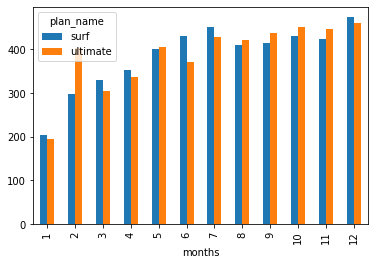

In [207]:
avg_duration.plot(kind='bar')

In [208]:
surf = df_monthly_data.query('plan_name == "surf"')
ultimate = df_monthly_data.query('plan_name == "ultimate"')

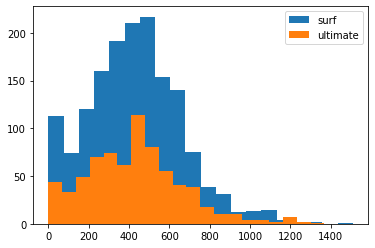

In [209]:
plt.hist(surf['total_durations'], bins=20, label='surf')
plt.hist(ultimate['total_durations'], bins=20, label='ultimate')
plt.legend()
plt.show()

In [210]:
dist_calls = df_monthly_data.pivot_table(index='plan_name', values='total_durations', aggfunc=['mean', 'var'])

In [211]:
dist_calls.columns = ['mean', 'var']

In [212]:
dist_calls

,mean,var
plan_name,,
surf,428.749523,54968.279461
ultimate,430.450000,57844.464812


<AxesSubplot:>

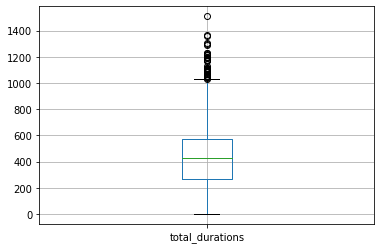

In [213]:
df_monthly_data.boxplot(column='total_durations')

Kesimpulan dari informasi di atas:
- Setiap pengguna memiliki perilaku yang berbeda untuk setiap paket. 
- Pengguna yang memiliki paket telpon ultimate lebih sedikit dibandingkan dengan yang memiliki paket telpon surf. Hal ini dikarenakan harganya yang mahal.
- Durasi pada paket surf lebih banyak jika dibandingkan dengan paket ultimate.
- Dari kedua paket memiliki pengguna dengan rata-rata jumlah durasi telpon yang hampir sama.
- Untuk histogram tersebut memiliki jenis skewness yang lebih condong ke arah ke kanan.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Pesan/SMS

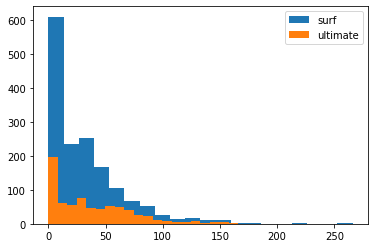

In [214]:
plt.hist(surf['messages_permonth'], bins=20, label='surf')
plt.hist(ultimate['messages_permonth'], bins=20, label='ultimate')
plt.legend()
plt.show()

In [215]:
dist_messages= df_monthly_data.pivot_table(index='plan_name', values='messages_permonth', aggfunc=['mean', 'std','var'])
dist_messages

,mean,std,var
,messages_permonth,messages_permonth,messages_permonth
plan_name,,,
surf,31.159568,33.566717,1126.724522
ultimate,37.551389,34.767179,1208.756744


<AxesSubplot:>

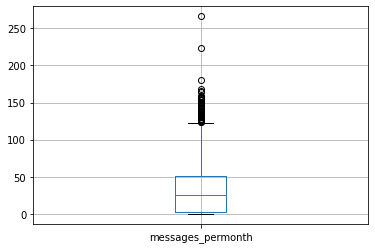

In [216]:
df_monthly_data.boxplot(column='messages_permonth')

Kesimpulan dari informasi di atas:
- Pengguna paket SMS surf lebih banyak dibandingkan dengan paket ultimate.
- Rata-rata SMS yang dikirimkan hampir sama meskipun yang lebih tinggi adalah pengguna paket ultimate.
- Histogram memiliki jenis skewness ke arah ke kanan.

## Internet

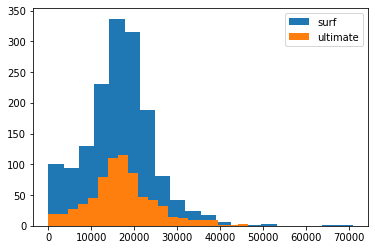

In [217]:
plt.hist(surf['volume_permonth'], bins=20, label='surf')
plt.hist(ultimate['volume_permonth'], bins=20, label='ultimate')
plt.legend()
plt.show()

In [218]:
dist_messages= df_monthly_data.pivot_table(index='plan_name', values='volume_permonth', aggfunc=['mean', 'std','var'])
dist_messages

,mean,std,var
,volume_permonth,volume_permonth,volume_permonth
plan_name,,,
surf,16558.283490,8013.513327,6.421640e+07
ultimate,17214.699694,7851.897435,6.165229e+07


<AxesSubplot:>

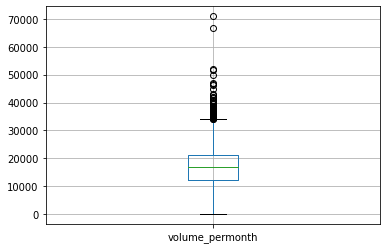

In [219]:
df_monthly_data.boxplot(column='volume_permonth')

Kesimpulan dari informasi di atas:
- Pengguna paket internet bisa dikatakan hampir mendekati sama.
- Pengguna internet paling banyak adalah pengguna pada paket surf.
- Histogram di atas menunjukkan kalau data tersebut memiliki skweness yang symetric.
- Artinya, rata-rata penggunaannya hampir sama.

## Pendapatan

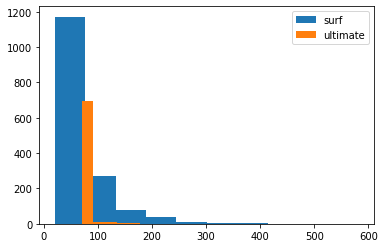

In [220]:
plt.hist(surf['profit'], bins=10, label='surf')
plt.hist(ultimate['profit'], bins=5, label='ultimate')
plt.legend()
plt.show()

In [221]:
desc_profit = df_monthly_data.pivot_table(index='plan_name', values='profit', aggfunc=['mean', 'std','var'])

In [222]:
desc_profit

,mean,std,var
,profit,profit,profit
plan_name,,,
surf,57.672846,53.860388,2900.941343
ultimate,72.116080,10.768848,115.968081


<AxesSubplot:>

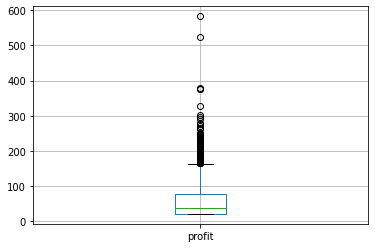

In [223]:
surf.boxplot(column='profit')

<AxesSubplot:>

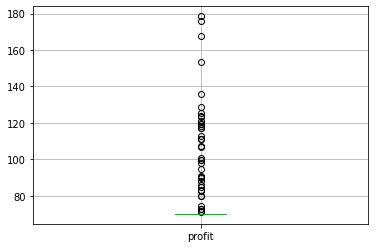

In [224]:
ultimate.boxplot(column='profit')

Kesimpulan dari informasi di atas:
- Profit dengan paket surf lebih banyak ketimbang paket ultimate. Hal ini dikarenakan paket surf yang lebih murah ketimbang paket ultimate.
- Meskipun nilai rata-rata profit ultimate lebih tinggi ketimbang surf. Namun, pemakaian paket surf banyak digunakan.
- Nilai distribusi dari paket surf lebih condong ke kanan. Ini artinya paket surf bisa lebih menguntungkan ketimbang paket ultimate.

# Menguji Hipotesis Statistik

- $H_0 : $ Rata-rata pendapatan dari penggunaan paket telpon surf dan paket telpon ultimate sama. 
- $H_1 : $ Rata-rata pendapatan dari penggunaan paket telpon surf dan paket telpon ultimate berbeda.

Karena kita akan menguji hipotesis apakah hipotesis bahwa pendapatan surf sama dengan atau tidak sama dengan ultimate. Maka kita menggunakan uji dua arah two-tailed test.

In [225]:
mean = surf['profit'].mean()
round(mean, 2)

57.67

In [226]:
ultimate['profit'].mean()

72.11607964409721

In [227]:
alpha = 0.05
results = st.stats.ttest_ind(surf['profit'], ultimate['profit'], equal_var=False)
print("p-value :", results.pvalue)

if (results.pvalue < alpha):
    print("Kita menolak hipotesis nol.")
else:
    print("Kita menerima hipotesis nol")

p-value : 8.530525302626667e-24
Kita menolak hipotesis nol.


/tmp/ipykernel_27/1286374878.py:2: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  results = st.stats.ttest_ind(surf['profit'], ultimate['profit'], equal_var=False)


- $H_0 : $ Rata-rata pendapatan dari pengguna di wilayah NY-NJ sama dengan pendapatan pengguna dari wilayah lain.
- $H_1 : $ Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

Sama halnya dengan hipotesis pendapatan dari tiap paket. Untuk hipotesis ini akan diuji dengan menggunakan two-tailed test. 

In [228]:
mean_ny_nj = df_monthly_data.query('city=="New York-Newark-Jersey City, NY-NJ-PA MSA"')
mean_other = df_monthly_data.query('city!="New York-Newark-Jersey City, NY-NJ-PA MSA"')

In [229]:
alpha = 0.05
results_city = st.stats.ttest_ind(mean_ny_nj['profit'], mean_other['profit'], equal_var=False)
print("p-value :", results_city.pvalue)

if (results_city.pvalue < alpha):
    print("Kita menolak hipotesis nol.")
else:
    print("Kita menerima hipotesis nol")

p-value : 0.020128295172528086
Kita menolak hipotesis nol.


/tmp/ipykernel_27/615522775.py:2: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  results_city = st.stats.ttest_ind(mean_ny_nj['profit'], mean_other['profit'], equal_var=False)


# Kesimpulan Umum

Sebelum melakukan analisis, kita perlu melakukan pra-pemrosesan. Diantaranya:
- Melakukan perubahan tipe data pada kolom yang berisi tanggal dan tipe data float menjadi integer. (Sesuai keperluan)
- Menambahkan kolom (Jika perlu) seperti kolom bulan, total panggilan, total sms, dan total penggunaan kuota.
- Setelah data sudah siap, selanjutnya adalah menggabungkan total penggunaan tadi berdasarkan user-nya.
- Setelah data digabungkan, selanjutnya adalah menambahkan profit atau keuntungan yang didapatkan dari setiap pengguna. Hal ini yang akan kita analisis.

Analisis pada grafik:
- Grafik yang digunakan untuk analisis ini adalah diagram batang untuk melihat penggunaan telpon dari setiap pengguna. Ternyata dari 12 bulan, 10 bulan paket telpon tipe surf banyak digunakan.
- Grafik selanjutnya adalah histogram, dilihat dari keseluruhan (telpon, sms, internet), data surf memiliki pengguna yang lebih banyak. Namun, untuk nilai rata-rata penggunaan nilainya hampir sama.
- Untuk grafik pendapatan. Mulai dari histogram paket surf banyak penggunanya karena harganya yang murah.
- Pada grafik boxplot, nilai distribusi dari paket surf lebih condong ke kanan. Yang artinya paket surf bisa menguntungkan ketimbang paket ultimate. 

Analisis Uji Hipotesis:
- Masuk ke dalam uji hipotesis. Dalam uji hipotesis ini kita akan mengambil uji hipotesis two-tailed test karena ke dua hipotesis tersebut ingin membuktikan sama atau tidak suatu pendapatan antata 2 paket dan antara NY-NJ dengan kota lainnya.
- Nilai alpha yang akan diambil 5% dan untuk sample-nya akan diambil nilai rata-rata dari paket dan kota Ny-NJ.
- Hasilnya: Rata-rata pendapatan dari penggunaan paket telpon surf dan paket ultimate berbeda dan pendapatan antara kota NY-NJ dan kota lain juga berbeda.

Hasil dari pengujian ini adalah paket yang paling menguntungkan adalah paket surf berdasarkan banyaknya pengguna dan nilai distribusi pada data meskipun nilai rata-rata pada paket ultimate lebih tinggi.